# Adsorption isotherms

> K adsorption isotherms in three disctinct soils. 

## Import 

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import fastcore.all as fc

## Data loading

In [276]:
fname = '../../_data/k-spiking-isotherms.xlsx'

In [277]:
dfs_sheets = pd.read_excel(fname, skiprows=1, usecols=[1,2,3,4,5], 
                           sheet_name=['LUI', 'SPA', 'TM'])

In [278]:
dfs_sheets['LUI'].head()

,Total dissolved,Total sorbed,Bound to SOM,Bound to Clay,k_titrated
0,0.000002,0.004998,0.000156,0.004843,5
1,0.000003,0.009997,0.000313,0.009684,10
2,0.000005,0.014995,0.000472,0.014523,15
3,0.000007,0.019993,0.000632,0.019360,20
4,0.000009,0.024991,0.000795,0.024196,25


Merge all sheets in one single data frame:

In [279]:
dfs = []
for key, df_sheet in dfs_sheets.items():
    df_sheet['soil'] = key
    dfs.append(df_sheet)
    
df = pd.concat(dfs, ignore_index=True)
df.head()

,Total dissolved,Total sorbed,Bound to SOM,Bound to Clay,k_titrated,soil
0,0.000002,0.004998,0.000156,0.004843,5,LUI
1,0.000003,0.009997,0.000313,0.009684,10,LUI
2,0.000005,0.014995,0.000472,0.014523,15,LUI
3,0.000007,0.019993,0.000632,0.019360,20,LUI
4,0.000009,0.024991,0.000795,0.024196,25,LUI


## Data preprocessing

In [280]:
# convert to cmol/kg
gvm = 20 # Gravimetric Moisture Content in %

In [281]:
# k_titrated in mmol/L while all others in mol/l
def to_cmol_kg(concentration, factor=1e-1, gvm=20): 
    return (concentration*factor)/(100/gvm)

In [282]:
df.columns

Index(['Total dissolved', 'Total sorbed', 'Bound to SOM', 'Bound to Clay',
       'k_titrated', 'soil'],
      dtype='object')

In [283]:
df[df['soil'] == 'LUI']

,Total dissolved,Total sorbed,Bound to SOM,Bound to Clay,k_titrated,soil
0,0.000002,0.004998,0.000156,0.004843,5,LUI
1,0.000003,0.009997,0.000313,0.009684,10,LUI
2,0.000005,0.014995,0.000472,0.014523,15,LUI
3,0.000007,0.019993,0.000632,0.019360,20,LUI
4,0.000009,0.024991,0.000795,0.024196,25,LUI
5,0.000011,0.029989,0.000960,0.029029,30,LUI
6,0.000014,0.034986,0.001126,0.033860,35,LUI
7,0.000016,0.039984,0.001295,0.038689,40,LUI
8,0.000018,0.044982,0.001466,0.043516,45,LUI
9,0.000021,0.049979,0.001639,0.048340,50,LUI


In [284]:
100*0.28/5

5.6000000000000005

In [268]:
from functools import partial

In [285]:
df['k_titrated'] = df['k_titrated'].apply(partial(to_cmol_kg, factor=1e-1))
coi = df.columns[:-2]
df[coi] = df[coi].apply(partial(to_cmol_kg, factor=1e2))

In [287]:
df

,Total dissolved,Total sorbed,Bound to SOM,Bound to Clay,k_titrated,soil
0,3.425800e-05,0.099966,0.003111,0.096854,0.1,LUI
1,6.993000e-05,0.199930,0.006255,0.193674,0.2,LUI
2,1.071000e-04,0.299900,0.009434,0.290460,0.3,LUI
3,1.458700e-04,0.399860,0.012649,0.387200,0.4,LUI
4,1.863400e-04,0.499820,0.015901,0.483920,0.5,LUI
5,2.286200e-04,0.599780,0.019191,0.580580,0.6,LUI
6,2.728400e-04,0.699720,0.022522,0.677200,0.7,LUI
7,3.191400e-04,0.799680,0.025896,0.773780,0.8,LUI
8,3.676800e-04,0.899640,0.029314,0.870320,0.9,LUI
9,4.185800e-04,0.999580,0.032776,0.966800,1.0,LUI


## Plotting isotherms

In [288]:
data = df[df.soil == 'LUI']

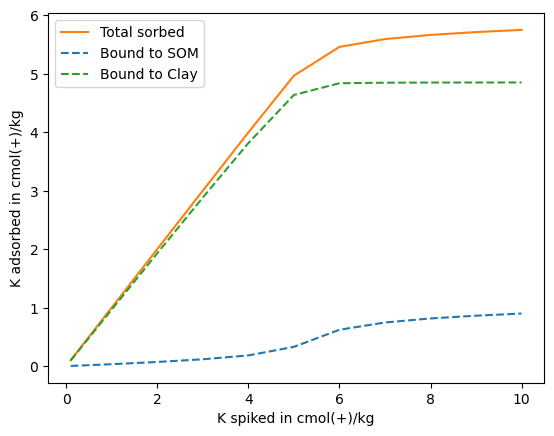

In [295]:
columns_to_plot = ['Total sorbed', 'Bound to SOM', 'Bound to Clay']

colors = ['tab:orange', 'tab:blue', 'tab:green']
#line_styles = ['-', '--', ':']
line_styles = ['-', '--', '--']

fig, ax = plt.subplots()
for col, color, line_style in zip(columns_to_plot, colors, line_styles):
    ax.plot(data['k_titrated'], data[col], color=color, linestyle=line_style, label=col)

plt.xlabel('K spiked in cmol(+)/kg') 
plt.ylabel('K adsorbed in cmol(+)/kg') 
ax.legend();